In [1]:
import sys
import os
from pathlib import Path
curr_dir = os.path.abspath('')
project_dir = Path(curr_dir).parent
sys.path.append(f"{project_dir}")
sys.path.append(f"{project_dir}/src")
sys.path

['/Users/albertinopadin/Desktop/Dev/Python Projects/PlaneRecognizer/notebooks',
 '/Users/albertinopadin/miniforge3/envs/dev/lib/python39.zip',
 '/Users/albertinopadin/miniforge3/envs/dev/lib/python3.9',
 '/Users/albertinopadin/miniforge3/envs/dev/lib/python3.9/lib-dynload',
 '',
 '/Users/albertinopadin/miniforge3/envs/dev/lib/python3.9/site-packages',
 '/Users/albertinopadin/miniforge3/envs/dev/lib/python3.9/site-packages/IPython/extensions',
 '/Users/albertinopadin/.ipython',
 '/Users/albertinopadin/Desktop/Dev/Python Projects/PlaneRecognizer',
 '/Users/albertinopadin/Desktop/Dev/Python Projects/PlaneRecognizer/src']

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from Common.DL_FilePaths import SIZE_1920_DIR

/Users/albertinopadin/miniforge3/envs/dev/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [3]:
train_dir = SIZE_1920_DIR + '/train'

augs_gen = ImageDataGenerator(
    data_format='channels_last',
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)


img_target_size = (862, 862)
batch_size = 2

train_gen = augs_gen.flow_from_directory(
    train_dir,
    target_size=img_target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    interpolation='lanczos'
)

valid_gen = augs_gen.flow_from_directory(
    train_dir,
    target_size=(862, 862),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation',
    interpolation='box'
)

Found 4437 images belonging to 6 classes.
Found 441 images belonging to 6 classes.


In [4]:
train_imgs, train_labels = next(train_gen)

In [5]:
train_imgs[0].shape

(862, 862, 3)

In [6]:
train_labels

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [7]:
from PIL import Image
import numpy as np

In [8]:
def get_image(np_tensor):
    return Image.fromarray(np.uint8(np_tensor*255))

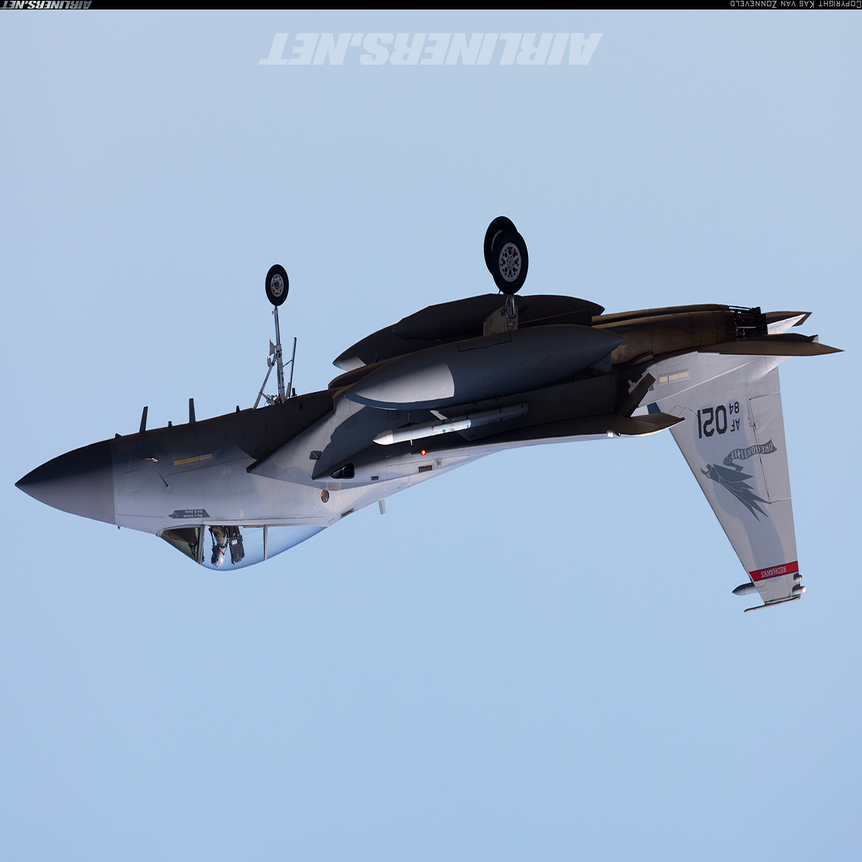

In [9]:
get_image(train_imgs[0])

In [10]:
val_imgs, val_labels = next(valid_gen)

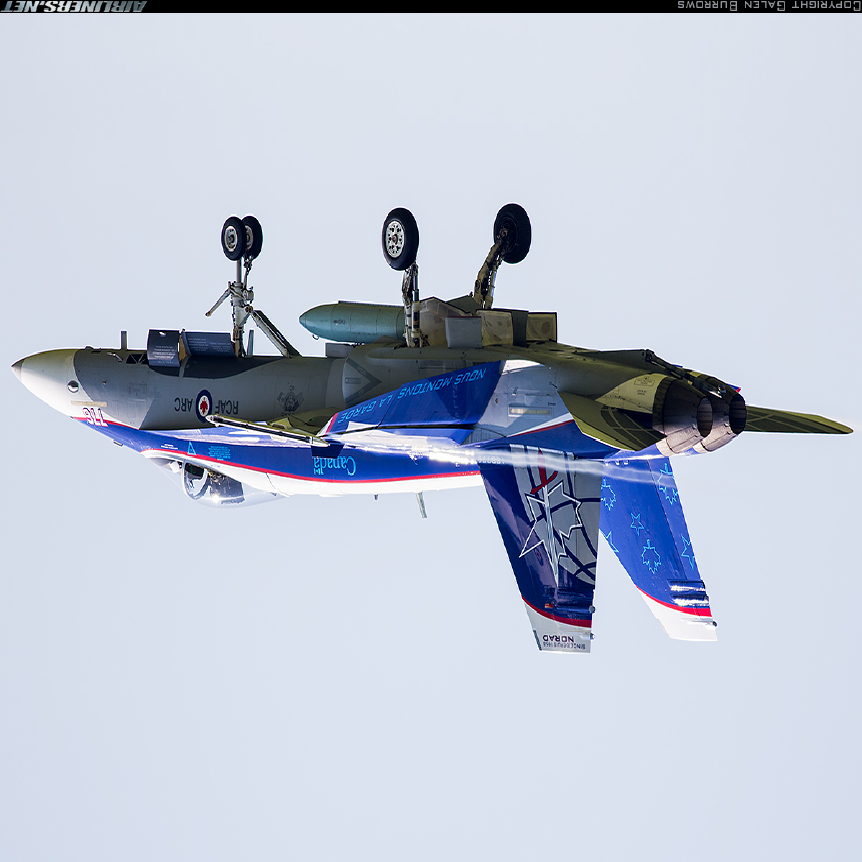

In [11]:
get_image(val_imgs[0])

In [13]:
from JetRecognizer.ImageGenerator import ImageGenerator
from ImagePreprocessing.ImagePreprocessing import load_label_encoder

In [14]:
LABEL_ENCODER_FILENAME = "jet_label_classes.npy"
label_encoder = load_label_encoder(LABEL_ENCODER_FILENAME)

In [16]:
img_iter = ImageGenerator(train_dir, batch_size=4, label_encoder=label_encoder, one_hot_labels=True)

In [17]:
img_iter

In [19]:
timgs, tlbls = img_iter.__getitem__(0)

Metal device set to: Apple M1 Max


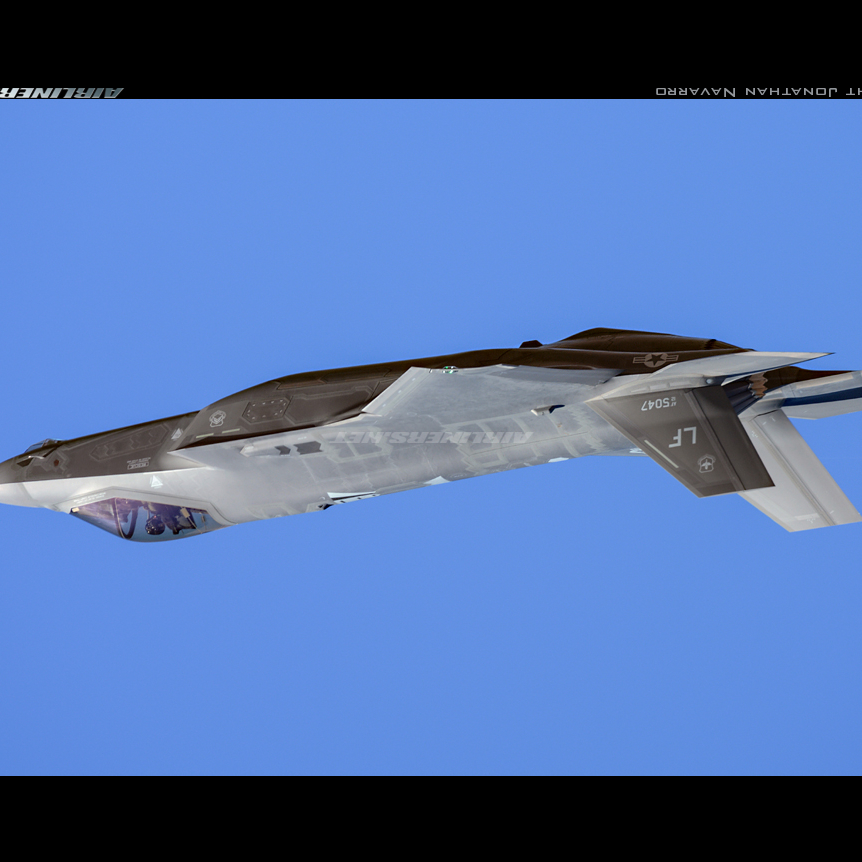

In [23]:
get_image(timgs[0])

In [22]:
tlbls

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
label_encoder.get_params()